In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


NaN qiymatlar yo'q ekan

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## One hot encoding

In [6]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

one hot encoding ni "sex", "smoker", va "region" ustunlarida qilsak bo'ladi

In [7]:
pd.get_dummies(data=insurance).head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


Chiqgan javoblar True, False bo'ldi, ularni int (0 va 1) ga o'giramiz

In [8]:
one_hot_encoding = pd.get_dummies(data=insurance, dtype=int)
one_hot_encoding.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Juda ham katta bo'lib ketgani sabsbli har bitta Encoding qilingan  ustundan birinchisini tashlab yuboramiz

In [9]:
one_hot_encoding = pd.get_dummies(data=insurance, dtype=int, drop_first=True)
one_hot_encoding.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [10]:
one_hot_encoding = pd.get_dummies(data=insurance, dtype=int, drop_first=True, prefix=["jins", "chekuvchi", "viloyati"])
one_hot_encoding.head()

,age,bmi,children,charges,jins_male,chekuvchi_yes,viloyati_northwest,viloyati_southeast,viloyati_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Label Encoding

In [11]:
le_sex = LabelEncoder()
le_sex.fit(insurance["sex"])
le_smoker = LabelEncoder()
le_smoker.fit(insurance["smoker"])
le_region = LabelEncoder()
le_region.fit(insurance["region"])

LabelEncoder()

In [12]:
print(le_sex.classes_, le_smoker.classes_, le_region.classes_)

['female' 'male'] ['no' 'yes'] ['northeast' 'northwest' 'southeast' 'southwest']


ayollar - 0, erkaklar - 1;

chekmaydiganlar - 0, chekuvhilar - 1;

northeast - 0, northwest - 1, southeast - 2, southwest - 3

In [13]:
insurance["jins"] = le_sex.transform(insurance["sex"])
insurance["chekuvchi"] = le_smoker.transform(insurance["smoker"])
insurance["viloyat"]=le_region.transform(insurance["region"])

Yuqoridagi ikkita "fit" va "transform" ni birlashtirib, bitta "fit_transform" usulidan foydalansak ham bo'ladi. Pandas ni o'zini ham "factorize" metodi ham bor

In [14]:
insurance

,age,sex,bmi,children,smoker,region,charges,jins,chekuvchi,viloyat
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


## Outlierlar ni chiqarib tashlaymiz

Bilamizki buni 3ta usuli bor:

Gaussian distribution (mean and std)

Inter-quantal range proximity rule

Quantiles

<Axes: xlabel='bmi', ylabel='Count'>

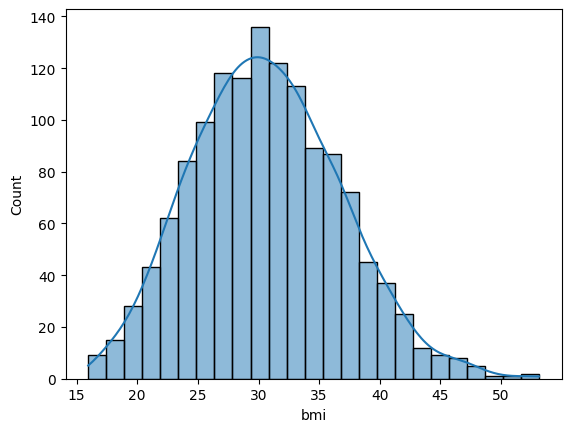

In [15]:
sns.histplot(data = insurance, x= "bmi", kde=True)

<Axes: xlabel='charges', ylabel='Count'>

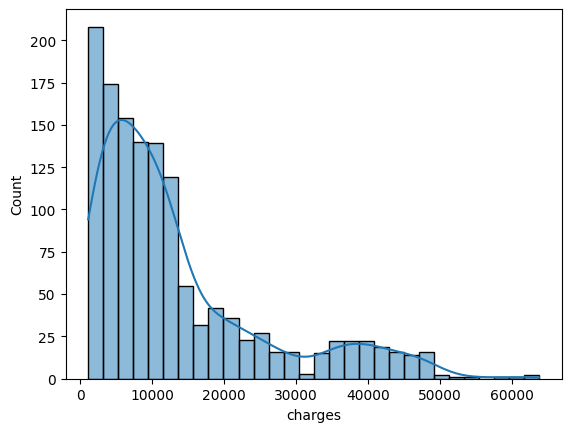

In [16]:
sns.histplot(data = insurance, x= "charges", kde=True)

<Axes: xlabel='age', ylabel='Count'>

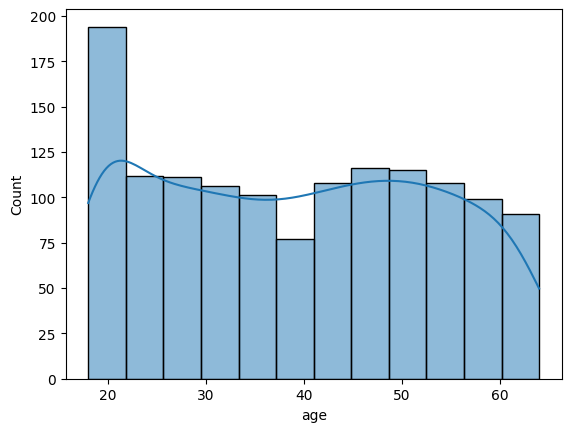

In [17]:
sns.histplot(data = insurance, x= "age", kde=True)

### Gaussian distribution (mean and std) metodi

Normal distribution da ishlatilgani sababli faqat "bmi" ga qo'llaymiz

In [18]:
threshold = 2.69
upper_limit = insurance["bmi"].mean()+threshold*insurance["bmi"].std()
lower_limit = insurance["bmi"].mean()-threshold*insurance["bmi"].std()
filt = insurance[(insurance["bmi"] <= upper_limit) & (insurance["bmi"] >= lower_limit)]
filt

,age,sex,bmi,children,smoker,region,charges,jins,chekuvchi,viloyat
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


<Axes: xlabel='bmi', ylabel='Count'>

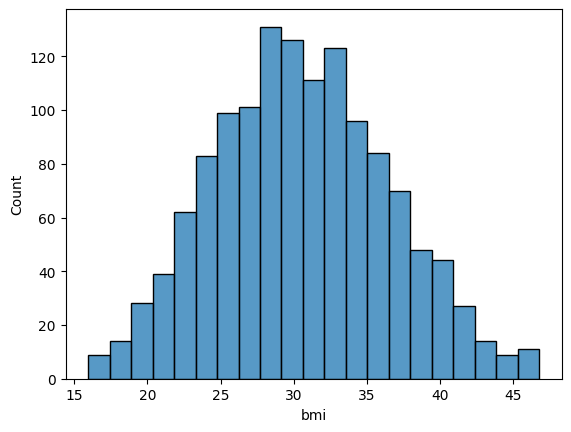

In [19]:
sns.histplot(data = filt, x="bmi")

<Axes: xlabel='bmi'>

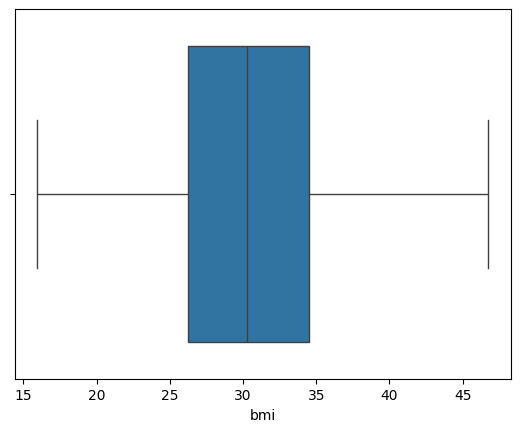

In [20]:
sns.boxplot(data = filt, x="bmi")

### Inter-quantal range proximity rule metodi

● IQR = 75th Quantile – 25th Quantile

● Upper limit = 75th Quantile + IQR × 1.5

● Lower limit = 25th Quantile - IQR × 1.5

In [21]:
quan_25 = insurance["charges"].quantile(0.25)
quan_75 = insurance["charges"].quantile(0.75)
IQR = quan_75 - quan_25
upper_lim = quan_75 + 1.5*IQR
lower_lim = quan_25 - 1.5*IQR
filt_2 = insurance[(insurance["charges"] <= upper_lim) & (insurance["charges"] >= lower_lim)]
filt_2

,age,sex,bmi,children,smoker,region,charges,jins,chekuvchi,viloyat
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


<Axes: xlabel='charges', ylabel='Count'>

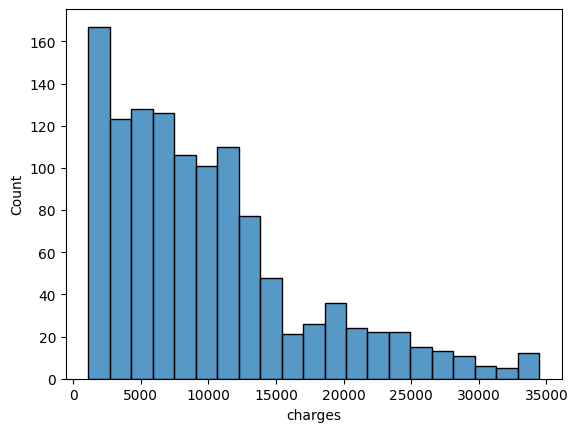

In [22]:
sns.histplot(data = filt_2, x="charges")

<Axes: xlabel='charges'>

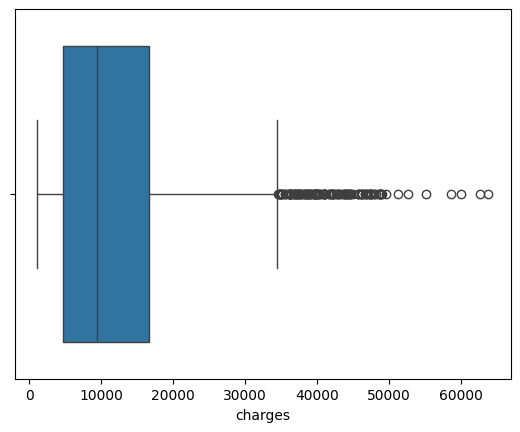

In [23]:
sns.boxplot(data = insurance, x="charges")

<Axes: xlabel='charges'>

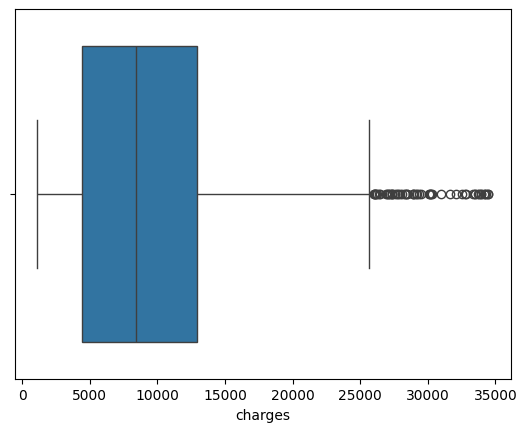

In [24]:
sns.boxplot(data = filt_2, x="charges")

Formula orqali outlier larimizni asosiy qismi chiqib ketdi

### Quantiles metodi (95% va 5%)

In [25]:
quan_5 = insurance["age"].quantile(0.05)
quan_95 = insurance["age"].quantile(0.95)
up_lim = quan_95
low_lim = quan_5
filt_3 = insurance[(insurance["age"] <= up_lim) & (insurance["age"] >= low_lim)]
filt_3

,age,sex,bmi,children,smoker,region,charges,jins,chekuvchi,viloyat
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


<Axes: xlabel='age', ylabel='Count'>

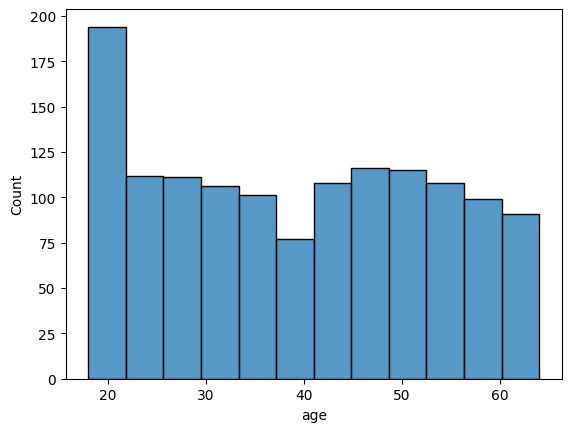

In [26]:
sns.histplot(data = insurance, x="age")

<Axes: xlabel='age', ylabel='Count'>

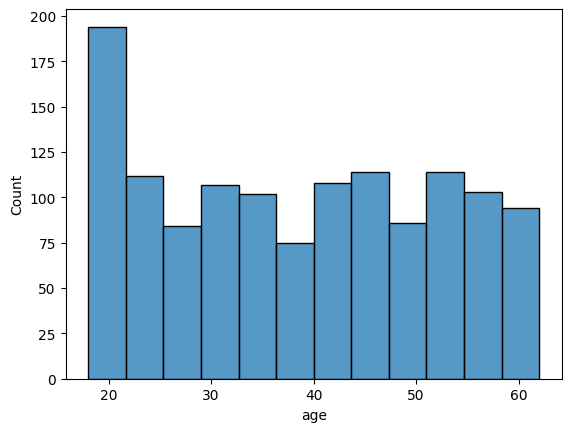

In [27]:
sns.histplot(data = filt_3, x="age")

<Axes: xlabel='age'>

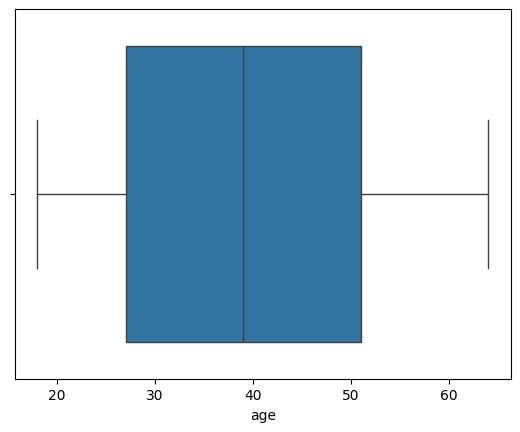

In [28]:
sns.boxplot(data = insurance, x="age")

<Axes: xlabel='age'>

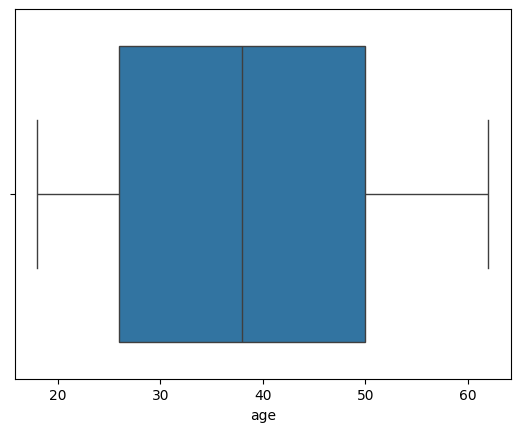

In [29]:
sns.boxplot(data = filt_3, x="age")

Bu ustunimizda outlier lar yo'q bo'lgani sababli ko'rinmadi